Project - 5 

Problem statement : Pick up the stocks from the "Stocks" dataset and generate forecasts accordingly

End to End ARIMA forecasting model is being used on the stocks to generate forecasts

Stocks :
1) SP500
2) NASDAQ.AAPL
3) NASDAQ.ADP
4) NASDAC.CBOE
5) NASDAC.CSCO
6) NASDAQ.EBAY


Analyzing SP500

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data

In [3]:
#Read CSV (comma-separated) file into DataFrame
df = pd.read_csv('data_stocks.csv')

In [4]:
# Data Exploration/Analysis

In [5]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
df.describe() #The summary statistics of the df dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
df.info() #Prints information about df DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [8]:
df.columns #Columns of df dataframe

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [9]:
df.shape #Return a tuple representing the dimensionality of df DataFrame.

(41266, 502)

In [10]:
df.isnull().values.any() #Check for any NA’s in the dataframe.

False

Analyzing SP500

In [11]:
#df_1 = df.copy() #Makes a copy of df dataframe.

In [12]:
# Creating  column (1) with log values, (2) diff with log and lag 
df['logsp500']= np.log(df['SP500'])

# Creating a column with log values
df['diflogsp500']= df['logsp500'] - df['logsp500'].shift(periods=-1)
df = df.dropna()

In [13]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logsp500,diflogsp500
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,7.767945,-0.000207
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,7.768153,0.000601
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,7.767552,-0.000690
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,7.768242,-0.000228
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,7.768470,-0.000326


In [14]:
data = df[['DATE', 'SP500', 'logsp500', 'diflogsp500']]

In [15]:
data.head()

,DATE,SP500,logsp500,diflogsp500
0,1491226200,2363.6101,7.767945,-0.000207
1,1491226260,2364.1001,7.768153,0.000601
2,1491226320,2362.6799,7.767552,-0.000690
3,1491226380,2364.3101,7.768242,-0.000228
4,1491226440,2364.8501,7.768470,-0.000326


Text(0.5, 0, 'Day')

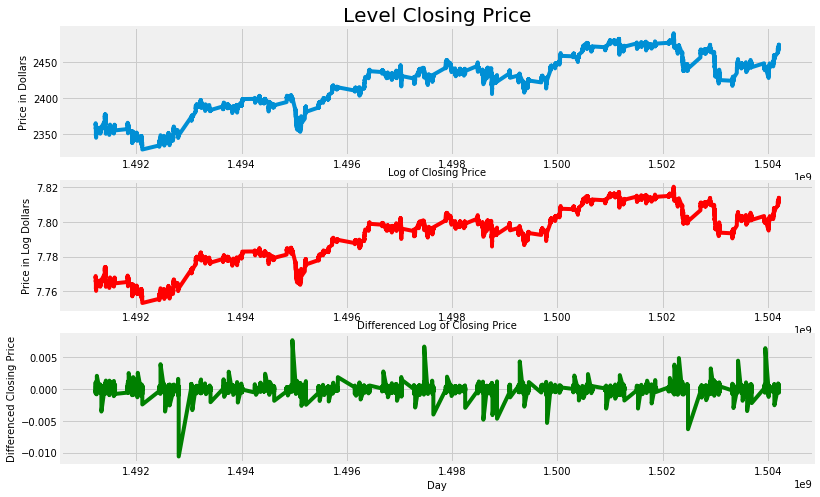

In [16]:
# Plot the 3 graphs of SP500,logsp500  and diflogsp500
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.DATE, data.SP500, label = "SP500 Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.DATE, data.logsp500, label = 'Log of SP500', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.DATE, data.diflogsp500, label = '1st Difference of Log of SP500', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0, 0.5, 'PACF')

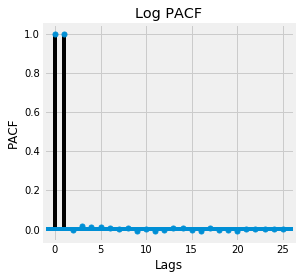

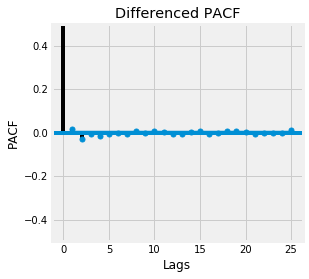

In [17]:
# Plot PACF for logsp500 and diflogsp500
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.logsp500, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.diflogsp500, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Text(0.5, 1.0, 'Logged Differenced ACF Plot')

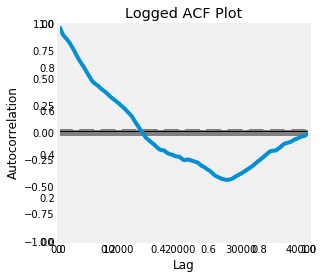

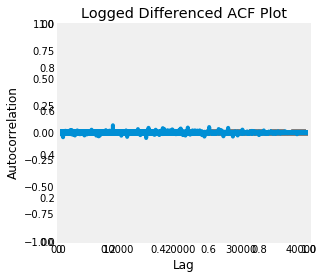

In [18]:
# Plot ACF for logsp500 and diflogsp500

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.logsp500)
ax.set_title('Logged ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.diflogsp500)
ax.set_title('Logged Differenced ACF Plot')

The Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [19]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogsp500, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -29.797448
p-value                            0.000000
# Lags Used                       45.000000
Number of Observations used    41219.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [20]:
# Define the model by calling ARIMA() and passing in the p, d, and q parameters

ararray = (data.logsp500.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

# Fetch the p,d,q values and identify the best model
for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
                  

(0, 1, 0) -576197.2378325625
(0, 1, 1) -576205.4988830332
(0, 1, 2) -576244.0626306938
(1, 1, 0) -576204.8971420523
(1, 1, 1) -576210.877090487
(1, 1, 2) -576247.3238615177
(2, 1, 0) -576243.5825036691
(2, 1, 1) -576245.5796697028
(2, 1, 2) -576232.5837927887
Best Model is : (1, 1, 2)


In [21]:
ARIMIAmod

In [22]:
predict = ARIMIAmod.predict()
predict

array([ 1.07815510e-06,  4.15221043e-06, -1.49441259e-05, ...,
        1.09460990e-05, -2.19487949e-06, -3.35349140e-06])

In [23]:
predict.shape

(41264,)

In [24]:
len(ARIMIAmod.predict())

41264

In [25]:
data1 = data.drop(data.index[0])

In [26]:
data1.shape

(41264, 4)

In [27]:
data1['predict'] = predict

In [28]:
data1.head()

,DATE,SP500,logsp500,diflogsp500,predict
1,1491226260,2364.1001,7.768153,0.000601,0.000001
2,1491226320,2362.6799,7.767552,-0.000690,0.000004
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015
4,1491226440,2364.8501,7.768470,-0.000326,0.000030
5,1491226500,2365.6201,7.768795,0.000178,-0.000014


In [29]:
np.mean(np.square(np.array((data1['diflogsp500'] - data1['predict']))))

5.0545662220358195e-08

In [30]:
numofsteps = 1
stephead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[7.81217094, 7.81305108]])

In [31]:
error = (data1['diflogsp500'] - data1['predict'])
data1['sqrError'] = np.square(error)

In [32]:
data1.head()

,DATE,SP500,logsp500,diflogsp500,predict,sqrError
1,1491226260,2364.1001,7.768153,0.000601,0.000001,3.598060e-07
2,1491226320,2362.6799,7.767552,-0.000690,0.000004,4.814882e-07
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015,4.555076e-08
4,1491226440,2364.8501,7.768470,-0.000326,0.000030,1.261180e-07
5,1491226500,2365.6201,7.768795,0.000178,-0.000014,3.675101e-08


In [33]:
data1['errors'] = error

In [34]:
data1.head()

,DATE,SP500,logsp500,diflogsp500,predict,sqrError,errors
1,1491226260,2364.1001,7.768153,0.000601,0.000001,3.598060e-07,0.000600
2,1491226320,2362.6799,7.767552,-0.000690,0.000004,4.814882e-07,-0.000694
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015,4.555076e-08,-0.000213
4,1491226440,2364.8501,7.768470,-0.000326,0.000030,1.261180e-07,-0.000355
5,1491226500,2365.6201,7.768795,0.000178,-0.000014,3.675101e-08,0.000192


Text(0.5, 0, 'Month')

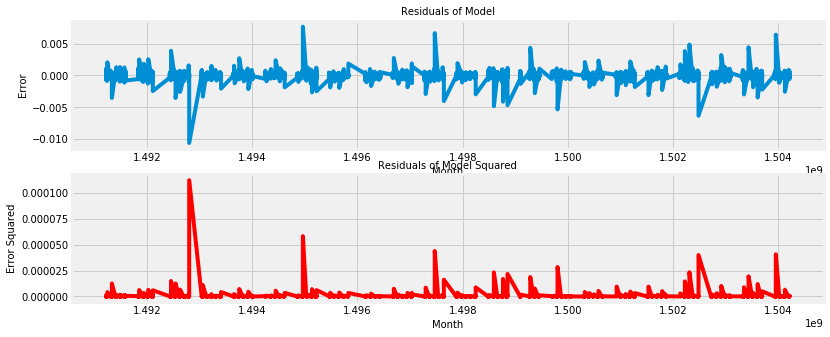

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data1.DATE, data1.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data1.DATE, data1.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)


Text(0.5, 1.0, 'Squared Error ACF Plot')

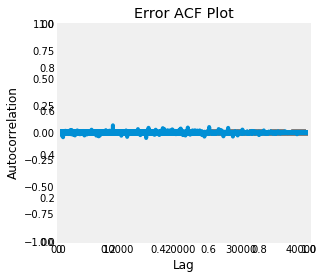

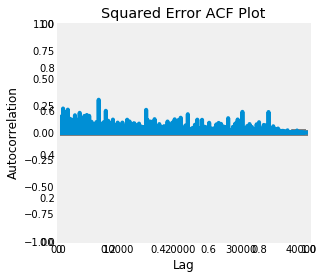

In [36]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data1.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data1.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0, 0.5, 'PACF')

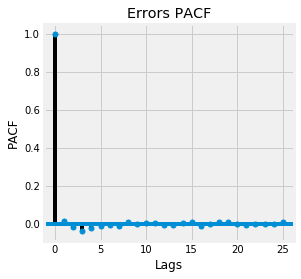

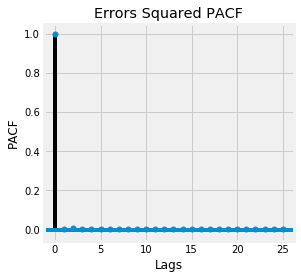

In [37]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data1.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data1.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Progressing on similar lines for rest of the stocks as above

Analyzing NASDAQ.AAPL

In [38]:
df1 = pd.read_csv('data_stocks.csv')

In [39]:
df1['logNASDAQ.AAPL']= np.log(df1['NASDAQ.AAPL'])
df1['diflogNASDAQ.AAPL']= df1['logNASDAQ.AAPL'] - df1['logNASDAQ.AAPL'].shift(periods=-1)
df1 = df1.dropna()

In [40]:
df1.shape

(41265, 504)

In [41]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835


In [42]:
data2 = df1[['DATE', 'NASDAQ.AAPL', 'logNASDAQ.AAPL', 'diflogNASDAQ.AAPL']]

In [43]:
data2.head()

,DATE,NASDAQ.AAPL,logNASDAQ.AAPL,diflogNASDAQ.AAPL
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


In [44]:
Data2 = data2.rename(index=str, columns={"NASDAQ.AAPL":"NASDAQ_AAPL", "logNASDAQ.AAPL":"logNASDAQ_AAPL", "diflogNASDAQ.AAPL":"diflogNASDAQ_AAPL"})
Data2.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


Text(0.5, 0, 'Day')

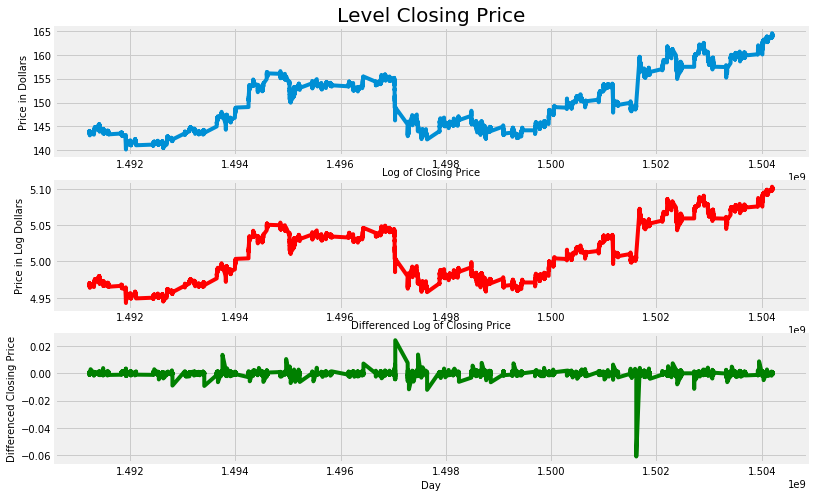

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data2.DATE, Data2.NASDAQ_AAPL, label = "NASDAQ.AAPL Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data2.DATE, Data2.logNASDAQ_AAPL, label = 'Log of NASDAQ.AAPL', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data2.DATE, Data2.diflogNASDAQ_AAPL, label = '1st Difference of Log of NASDAQ.AAPL', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0, 0.5, 'PACF')

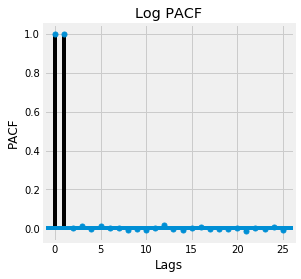

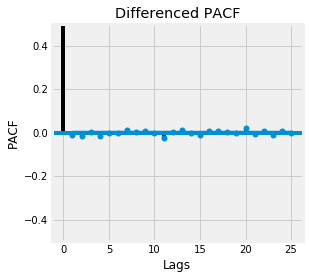

In [46]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data2.logNASDAQ_AAPL, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data2.diflogNASDAQ_AAPL, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [47]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest1 = adfuller(Data2.diflogNASDAQ_AAPL, autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest1[4].items():
    dfoutput1['Critical Value (%s)'%key] = value
print (dfoutput1)

Results of Dickey-Fuller Test:
Test Statistic                   -35.706087
p-value                            0.000000
# Lags Used                       30.000000
Number of Observations used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [48]:
ararray1 = (Data2.logNASDAQ_AAPL.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray1, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod1 = ARIMA(ararray1, (p,d,q)).fit()

(0, 1, 0) -492700.90926152444
(0, 1, 1) -492702.5489047559
(0, 1, 2) -492713.6664331138
(1, 1, 0) -492702.4248353723
(1, 1, 1) -492702.9177498944
(1, 1, 2) -492714.3652025151
(2, 1, 0) -492713.40239412786
(2, 1, 1) -492713.81356220256
Best Model is : (1, 1, 2)


In [49]:
ARIMIAmod1

In [50]:
predict1 = ARIMIAmod1.predict()
predict1

array([3.18659195e-06, 1.92993504e-06, 1.41783732e-06, ...,
       1.00565180e-05, 4.66664713e-06, 7.97919232e-06])

In [51]:
predict1.shape

(41264,)

In [52]:
len(ARIMIAmod1.predict())

41264

In [53]:
Data21 = Data2.drop(Data2.index[0])

In [54]:
Data21.shape

(41264, 4)

In [55]:
Data21['predict'] = predict1

In [56]:
Data21.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL,predict
1,1491226260,143.7000,4.967728,0.000069,0.000003
2,1491226320,143.6901,4.967659,0.000349,0.000002
3,1491226380,143.6400,4.967310,-0.000139,0.000001
4,1491226440,143.6600,4.967449,-0.000835,0.000008
5,1491226500,143.7800,4.968284,-0.000584,0.000008


In [57]:
np.mean(np.square(np.array((Data21['diflogNASDAQ_AAPL'] - Data21['predict']))))

3.8208716787998724e-07

In [58]:
numofsteps1 = 1
stephead1 = ARIMIAmod.forecast(numofsteps1)[0]
ferrors1 = ARIMIAmod.forecast(numofsteps1)[2]
ferrors1

array([[7.81217094, 7.81305108]])

In [59]:
error1 = (Data21['diflogNASDAQ_AAPL'] - Data21['predict'])
Data21['sqrError'] = np.square(error1)

In [60]:
Data21.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL,predict,sqrError
1,1491226260,143.7000,4.967728,0.000069,0.000003,4.317713e-09
2,1491226320,143.6901,4.967659,0.000349,0.000002,1.202688e-07
3,1491226380,143.6400,4.967310,-0.000139,0.000001,1.978105e-08
4,1491226440,143.6600,4.967449,-0.000835,0.000008,7.113123e-07
5,1491226500,143.7800,4.968284,-0.000584,0.000008,3.501069e-07


In [61]:
Data21['errors'] = error1

In [62]:
Data21.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL,predict,sqrError,errors
1,1491226260,143.7000,4.967728,0.000069,0.000003,4.317713e-09,0.000066
2,1491226320,143.6901,4.967659,0.000349,0.000002,1.202688e-07,0.000347
3,1491226380,143.6400,4.967310,-0.000139,0.000001,1.978105e-08,-0.000141
4,1491226440,143.6600,4.967449,-0.000835,0.000008,7.113123e-07,-0.000843
5,1491226500,143.7800,4.968284,-0.000584,0.000008,3.501069e-07,-0.000592


Text(0.5, 0, 'Month')

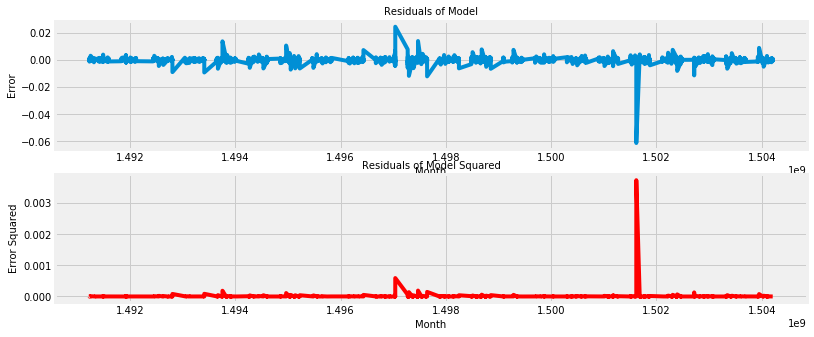

In [63]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data21.DATE, Data21.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data21.DATE, Data21.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0.5, 1.0, 'Squared Error ACF Plot')

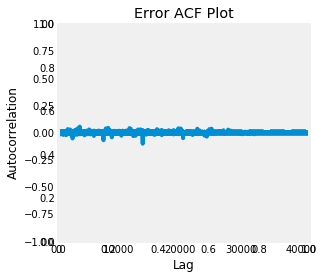

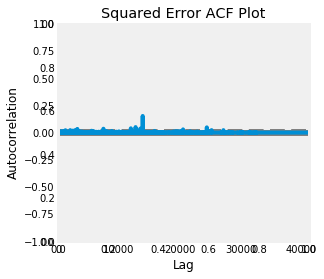

In [64]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data21.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data21.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0, 0.5, 'PACF')

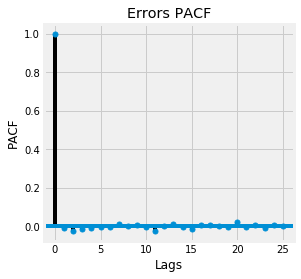

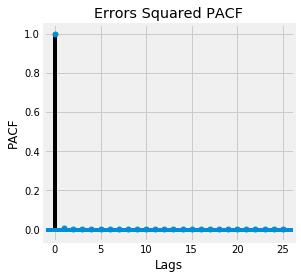

In [65]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data21.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data21.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Analyzing NASDAQ.ADP

In [66]:
df2 = df1
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835


In [67]:
df2['logNASDAQ.ADP']= np.log(df2['NASDAQ.ADP'])
df2['diflogNASDAQ.ADP']= df2['logNASDAQ.ADP'] - df2['logNASDAQ.ADP'].shift(periods=-1)
df2 = df2.dropna()

In [68]:
df2.shape

(41264, 506)

In [69]:
data3 = df2[['DATE', 'NASDAQ.ADP', 'logNASDAQ.ADP', 'diflogNASDAQ.ADP']]

In [70]:
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196


In [71]:
data3.head()

,DATE,NASDAQ.ADP,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


In [72]:
Data3 = data3.rename(index=str, columns={"NASDAQ.ADP":"NASDAQ_ADP", "logNASDAQ.ADP":"logNASDAQ_ADP", "diflogNASDAQ.ADP":"diflogNASDAQ_ADP"})
Data3.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


Text(0.5, 0, 'Day')

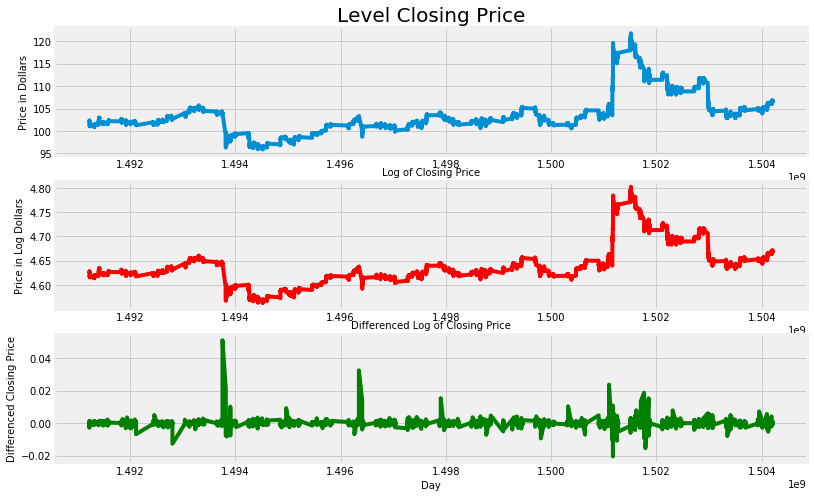

In [73]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data3.DATE, Data3.NASDAQ_ADP, label = "NASDAQ.ADP Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data3.DATE, Data3.logNASDAQ_ADP, label = 'Log of NASDAQ.ADP', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data3.DATE, Data3.diflogNASDAQ_ADP, label = '1st Difference of Log of NASDAQ.ADP', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0, 0.5, 'PACF')

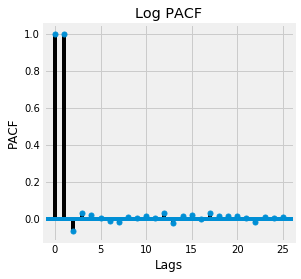

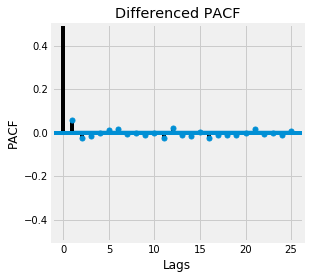

In [74]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data3.logNASDAQ_ADP, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data3.diflogNASDAQ_ADP, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [75]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest2 = adfuller(Data3.diflogNASDAQ_ADP, autolag='AIC')
dfoutput2 = pd.Series(dftest2[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest2[4].items():
    dfoutput2['Critical Value (%s)'%key] = value
print (dfoutput2)

Results of Dickey-Fuller Test:
Test Statistic                   -30.760137
p-value                            0.000000
# Lags Used                       39.000000
Number of Observations used    41224.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [76]:
ararray2 = (Data3.logNASDAQ_ADP.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray2, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod2 = ARIMA(ararray2, (p,d,q)).fit()

(0, 1, 0) -482518.2036049923
(0, 1, 1) -482670.44153660245
(0, 1, 2) -482684.1448843109
(1, 1, 0) -482663.57409683114
(1, 1, 1) -482678.7743378909
(1, 1, 2) -482692.39707006665
(2, 1, 0) -482690.10050829046
(2, 1, 1) -482694.9517535401
(2, 1, 2) -482704.9187782487
Best Model is : (2, 1, 2)


In [77]:
ARIMIAmod2

In [78]:
predict2 = ARIMIAmod2.predict()
predict2

array([ 9.90885836e-07, -5.07098768e-05,  6.55033228e-05, ...,
        6.84644472e-06, -4.25289051e-05,  2.50783930e-05])

In [79]:
predict2.shape

(41263,)

In [80]:
len(ARIMIAmod2.predict())

41263

In [81]:
Data31 = Data3.drop(Data3.index[0])

In [82]:
Data31.shape

(41263, 4)

In [83]:
Data31['predict'] = predict2

In [84]:
Data31.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP,predict
1,1491226260,102.1400,4.626344,-0.000710,9.908858e-07
2,1491226320,102.2125,4.627054,0.000710,-5.070988e-05
3,1491226380,102.1400,4.626344,0.000784,6.550332e-05
4,1491226440,102.0600,4.625561,0.000196,-3.619284e-05
5,1491226500,102.0400,4.625365,-0.002838,-4.546487e-05


In [85]:
np.mean(np.square(np.array((Data31['diflogNASDAQ_ADP'] - Data31['predict']))))

4.902448073082495e-07

In [86]:
numofsteps2 = 1
stephead2 = ARIMIAmod.forecast(numofsteps2)[0]
ferrors2 = ARIMIAmod.forecast(numofsteps2)[2]
ferrors2

array([[7.81217094, 7.81305108]])

In [87]:
error2 = (Data31['diflogNASDAQ_ADP'] - Data31['predict'])
Data31['sqrError'] = np.square(error2)

In [88]:
Data31.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP,predict,sqrError
1,1491226260,102.1400,4.626344,-0.000710,9.908858e-07,5.048801e-07
2,1491226320,102.2125,4.627054,0.000710,-5.070988e-05,5.780077e-07
3,1491226380,102.1400,4.626344,0.000784,6.550332e-05,5.155847e-07
4,1491226440,102.0600,4.625561,0.000196,-3.619284e-05,5.390532e-08
5,1491226500,102.0400,4.625365,-0.002838,-4.546487e-05,7.798207e-06


In [89]:
Data31['errors'] = error2

In [90]:
Data31.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP,predict,sqrError,errors
1,1491226260,102.1400,4.626344,-0.000710,9.908858e-07,5.048801e-07,-0.000711
2,1491226320,102.2125,4.627054,0.000710,-5.070988e-05,5.780077e-07,0.000760
3,1491226380,102.1400,4.626344,0.000784,6.550332e-05,5.155847e-07,0.000718
4,1491226440,102.0600,4.625561,0.000196,-3.619284e-05,5.390532e-08,0.000232
5,1491226500,102.0400,4.625365,-0.002838,-4.546487e-05,7.798207e-06,-0.002793


Text(0.5, 0, 'Month')

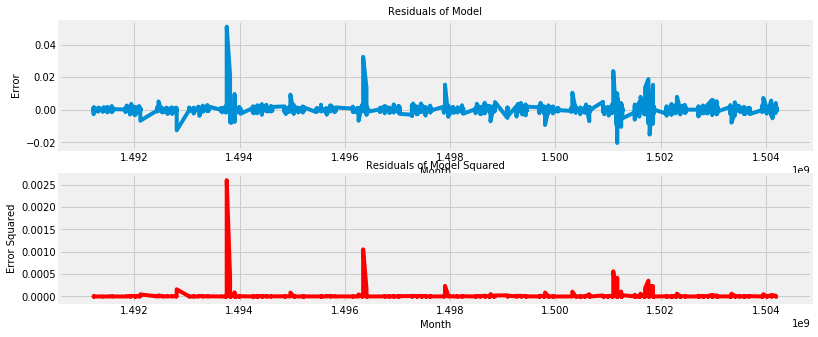

In [91]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data31.DATE, Data31.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data31.DATE, Data31.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0.5, 1.0, 'Squared Error ACF Plot')

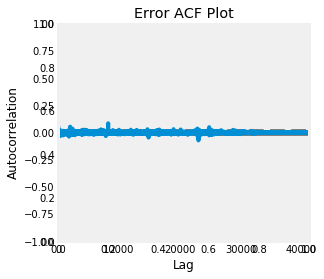

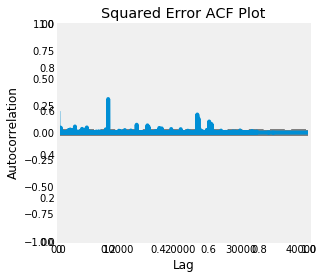

In [92]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data31.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data31.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0, 0.5, 'PACF')

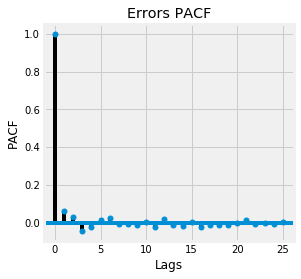

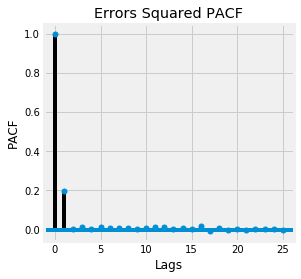

In [93]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data31.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data31.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Analyzing NASDAQ.CBOE

In [94]:
df3 = df1
df3.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196


In [95]:
df3['logNASDAQ.CBOE']= np.log(df3['NASDAQ.CBOE'])
df3['diflogNASDAQ.CBOE']= df3['logNASDAQ.CBOE'] - df3['logNASDAQ.CBOE'].shift(periods=-1)
df3 = df3.dropna()

In [96]:
df3.shape

(41264, 508)

In [97]:
data4 = df3[['DATE', 'NASDAQ.CBOE', 'logNASDAQ.CBOE', 'diflogNASDAQ.CBOE']]

In [98]:
df3.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CBOE,diflogNASDAQ.CBOE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232


In [99]:
data4.head()

,DATE,NASDAQ.CBOE,logNASDAQ.CBOE,diflogNASDAQ.CBOE
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


In [100]:
Data4 = data4.rename(index=str, columns={"NASDAQ.CBOE":"NASDAQ_CBOE", "logNASDAQ.CBOE":"logNASDAQ_CBOE", "diflogNASDAQ.CBOE":"diflogNASDAQ_CBOE"})
Data4.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


Text(0.5, 0, 'Day')

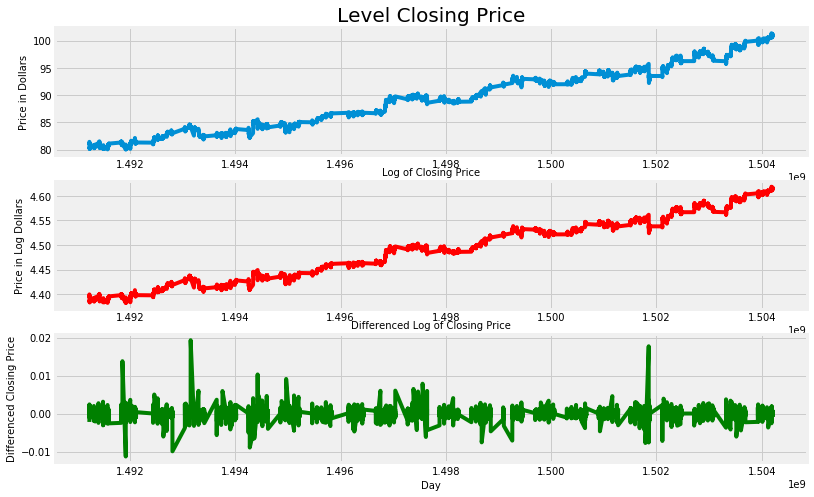

In [101]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data4.DATE, Data4.NASDAQ_CBOE, label = "NASDAQ.CBOE Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data4.DATE, Data4.logNASDAQ_CBOE, label = 'Log of NASDAQ.CBOE', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data4.DATE, Data4.diflogNASDAQ_CBOE, label = '1st Difference of Log of NASDAQ.CBOE', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0, 0.5, 'PACF')

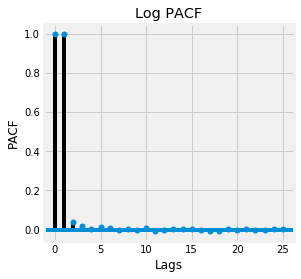

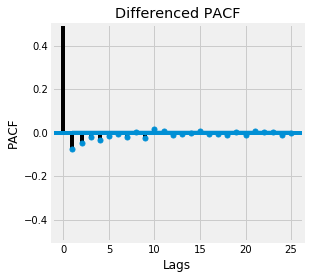

In [102]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data4.logNASDAQ_CBOE, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data4.diflogNASDAQ_CBOE, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [103]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest3 = adfuller(Data4.diflogNASDAQ_CBOE, autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest3[4].items():
    dfoutput3['Critical Value (%s)'%key] = value
print (dfoutput3)

Results of Dickey-Fuller Test:
Test Statistic                   -42.178016
p-value                            0.000000
# Lags Used                       25.000000
Number of Observations used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [104]:
ararray3 = (Data4.logNASDAQ_CBOE.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray3, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod3 = ARIMA(ararray3, (p,d,q)).fit()

(0, 1, 0) -506057.8630506855
(0, 1, 1) -506323.6109051106
(0, 1, 2) -506414.54809907475
(1, 1, 0) -506300.69347224815
(1, 1, 1) -506457.96282225277
(1, 1, 2) -506449.8538253716
(2, 1, 0) -506396.06013964175
(2, 1, 1) -506451.0434119025
(2, 1, 2) -506457.28648307547
Best Model is : (1, 1, 1)


In [105]:
ARIMIAmod3

In [106]:
predict3 = ARIMIAmod3.predict()
predict3

array([ 5.29426798e-06, -1.65743159e-04, -9.58111468e-05, ...,
        4.49103479e-06,  5.17195553e-06,  1.38616515e-05])

In [107]:
predict3.shape

(41263,)

In [108]:
len(ARIMIAmod3.predict())

41263

In [109]:
Data41 = Data4.drop(Data4.index[0])

In [110]:
Data41.shape

(41263, 4)

In [111]:
Data41['predict'] = predict3

In [112]:
Data41.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE,predict
1,1491226260,81.21,4.397038,0.000000,0.000005
2,1491226320,81.21,4.397038,0.000986,-0.000166
3,1491226380,81.13,4.396053,0.000123,-0.000096
4,1491226440,81.12,4.395930,-0.001232,0.000026
5,1491226500,81.22,4.397162,0.000739,0.000029


In [113]:
np.mean(np.square(np.array((Data41['diflogNASDAQ_CBOE'] - Data41['predict']))))

2.8158217407775853e-07

In [114]:
numofsteps3 = 1
stephead3 = ARIMIAmod.forecast(numofsteps3)[0]
ferrors3 = ARIMIAmod.forecast(numofsteps3)[2]
ferrors3

array([[7.81217094, 7.81305108]])

In [115]:
error3 = (Data41['diflogNASDAQ_CBOE'] - Data41['predict'])
Data41['sqrError'] = np.square(error3)

In [116]:
Data41.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE,predict,sqrError
1,1491226260,81.21,4.397038,0.000000,0.000005,2.802927e-11
2,1491226320,81.21,4.397038,0.000986,-0.000166,1.325559e-06
3,1491226380,81.13,4.396053,0.000123,-0.000096,4.799504e-08
4,1491226440,81.12,4.395930,-0.001232,0.000026,1.583679e-06
5,1491226500,81.22,4.397162,0.000739,0.000029,5.048179e-07


In [117]:
Data41['errors'] = error3

In [118]:
Data41.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE,predict,sqrError,errors
1,1491226260,81.21,4.397038,0.000000,0.000005,2.802927e-11,-0.000005
2,1491226320,81.21,4.397038,0.000986,-0.000166,1.325559e-06,0.001151
3,1491226380,81.13,4.396053,0.000123,-0.000096,4.799504e-08,0.000219
4,1491226440,81.12,4.395930,-0.001232,0.000026,1.583679e-06,-0.001258
5,1491226500,81.22,4.397162,0.000739,0.000029,5.048179e-07,0.000711


Text(0.5, 0, 'Month')

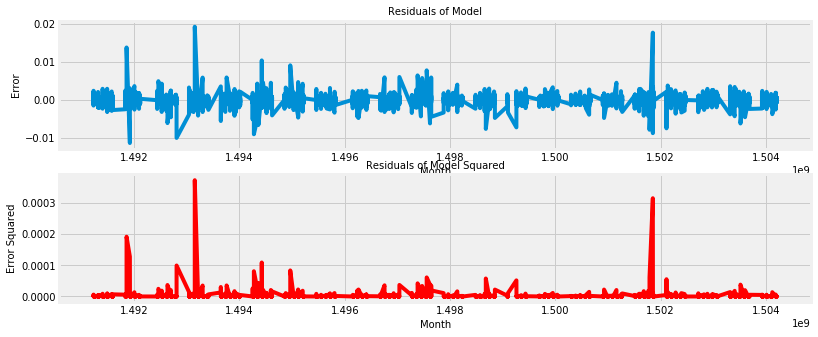

In [119]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data41.DATE, Data41.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data41.DATE, Data41.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0.5, 1.0, 'Squared Error ACF Plot')

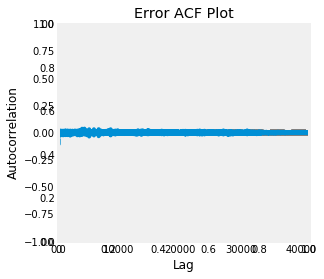

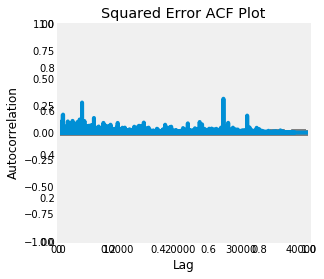

In [120]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data41.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data41.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0, 0.5, 'PACF')

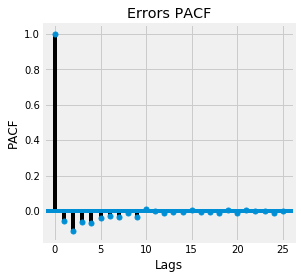

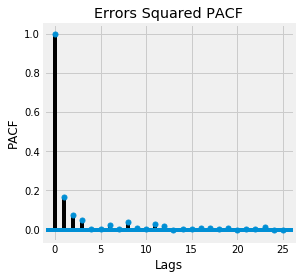

In [121]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data41.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data41.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Analyzing NASDAQ.CSCO

In [122]:
df4 = df1
df4.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CBOE,diflogNASDAQ.CBOE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232


In [123]:
df4['logNASDAQ.CSCO']= np.log(df4['NASDAQ.CSCO'])
df4['diflogNASDAQ.CSCO']= df4['logNASDAQ.CSCO'] - df4['logNASDAQ.CSCO'].shift(periods=-1)
df4 = df4.dropna()

In [124]:
df4.shape

(41264, 510)

In [125]:
data5 = df4[['DATE', 'NASDAQ.CSCO', 'logNASDAQ.CSCO', 'diflogNASDAQ.CSCO']]

In [126]:
df4.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CBOE,diflogNASDAQ.CBOE,logNASDAQ.CSCO,diflogNASDAQ.CSCO
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,121.700,53.365,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181


In [127]:
data5.head()

,DATE,NASDAQ.CSCO,logNASDAQ.CSCO,diflogNASDAQ.CSCO
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


In [128]:
Data5 = data5.rename(index=str, columns={"NASDAQ.CSCO":"NASDAQ_CSCO", "logNASDAQ.CSCO":"logNASDAQ_CSCO", "diflogNASDAQ.CSCO":"diflogNASDAQ_CSCO"})
Data5.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


Text(0.5, 0, 'Day')

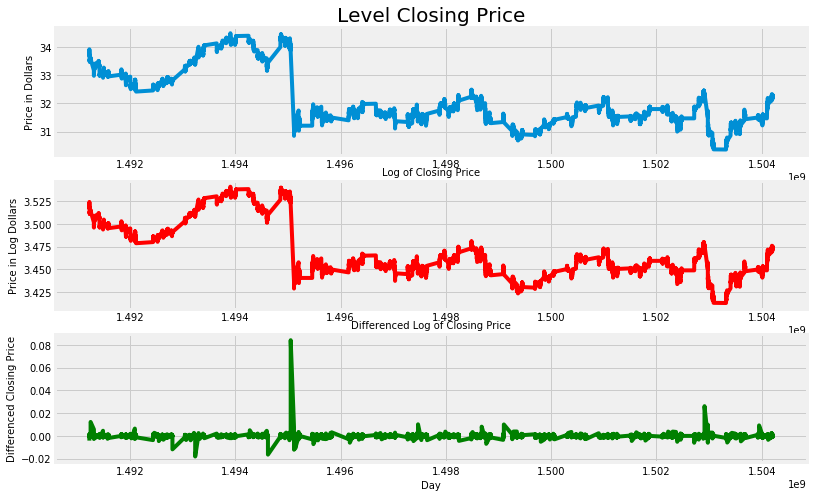

In [129]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data5.DATE, Data5.NASDAQ_CSCO, label = "NASDAQ.CSCO Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data5.DATE, Data5.logNASDAQ_CSCO, label = 'Log of NASDAQ.CSCO', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data5.DATE, Data5.diflogNASDAQ_CSCO, label = '1st Difference of Log of NASDAQ.CSCO', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0, 0.5, 'PACF')

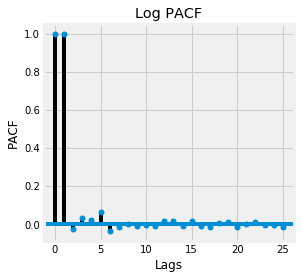

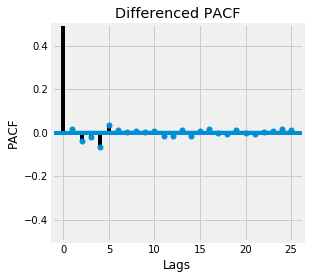

In [130]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data5.logNASDAQ_CSCO, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data5.diflogNASDAQ_CSCO, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [131]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest4 = adfuller(Data5.diflogNASDAQ_CSCO, autolag='AIC')
dfoutput3 = pd.Series(dftest4[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest4[4].items():
    dfoutput3['Critical Value (%s)'%key] = value
print (dfoutput3)

Results of Dickey-Fuller Test:
Test Statistic                   -30.367866
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations used    41217.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [132]:
ararray4 = (Data5.logNASDAQ_CSCO.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray4, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod4 = ARIMA(ararray4, (p,d,q)).fit()

(0, 1, 0) -486841.0000605817
(0, 1, 1) -486850.5326705236
(0, 1, 2) -486911.66600948037
(1, 1, 0) -486849.73719298304
(1, 1, 1) -486851.296924865
(1, 1, 2) -486911.2759097405
(2, 1, 0) -486905.85959496675
(2, 1, 1) -486904.30027083505
(2, 1, 2) -486921.2386159436
Best Model is : (2, 1, 2)


In [133]:
ARIMIAmod4

In [134]:
predict4 = ARIMIAmod4.predict()
predict4

array([-1.13818719e-06,  6.46211213e-05, -1.47529990e-04, ...,
        4.25302374e-06,  2.62257758e-05, -1.00890153e-05])

In [135]:
predict4.shape

(41263,)

In [136]:
len(ARIMIAmod4.predict())

41263

In [137]:
Data51 = Data5.drop(Data5.index[0])

In [138]:
Data51.shape

(41263, 4)

In [139]:
Data51['predict'] = predict4

In [140]:
Data51.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO,predict
1,1491226260,33.8800,3.522825,-0.000590,-0.000001
2,1491226320,33.9000,3.523415,0.001479,0.000065
3,1491226380,33.8499,3.521936,0.000293,-0.000148
4,1491226440,33.8400,3.521644,-0.001181,-0.000044
5,1491226500,33.8800,3.522825,-0.000590,0.000034


In [141]:
np.mean(np.square(np.array((Data51['diflogNASDAQ_CSCO'] - Data51['predict']))))

4.402850845113774e-07

In [142]:
numofsteps4 = 1
stephead4 = ARIMIAmod.forecast(numofsteps4)[0]
ferrors4 = ARIMIAmod.forecast(numofsteps4)[2]
ferrors4

array([[7.81217094, 7.81305108]])

In [143]:
error4 = (Data51['diflogNASDAQ_CSCO'] - Data51['predict'])
Data51['sqrError'] = np.square(error4)

In [144]:
Data51.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO,predict,sqrError
1,1491226260,33.8800,3.522825,-0.000590,-0.000001,3.469286e-07
2,1491226320,33.9000,3.523415,0.001479,0.000065,2.000381e-06
3,1491226380,33.8499,3.521936,0.000293,-0.000148,1.936356e-07
4,1491226440,33.8400,3.521644,-0.001181,-0.000044,1.293077e-06
5,1491226500,33.8800,3.522825,-0.000590,0.000034,3.890861e-07


In [145]:
Data51['errors'] = error4

In [146]:
Data51.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO,predict,sqrError,errors
1,1491226260,33.8800,3.522825,-0.000590,-0.000001,3.469286e-07,-0.000589
2,1491226320,33.9000,3.523415,0.001479,0.000065,2.000381e-06,0.001414
3,1491226380,33.8499,3.521936,0.000293,-0.000148,1.936356e-07,0.000440
4,1491226440,33.8400,3.521644,-0.001181,-0.000044,1.293077e-06,-0.001137
5,1491226500,33.8800,3.522825,-0.000590,0.000034,3.890861e-07,-0.000624


Text(0.5, 0, 'Month')

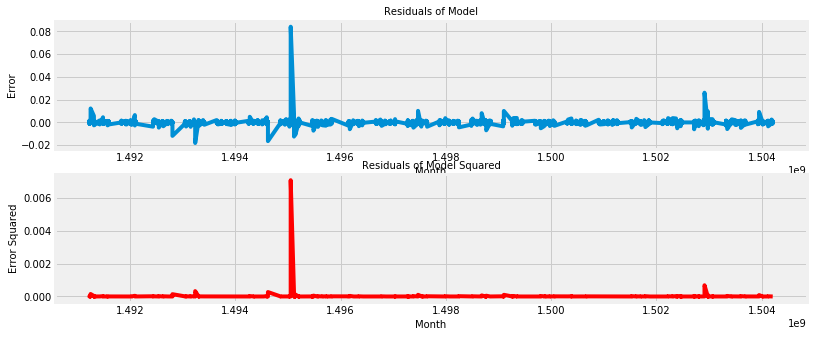

In [147]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data51.DATE, Data51.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data51.DATE, Data51.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0.5, 1.0, 'Squared Error ACF Plot')

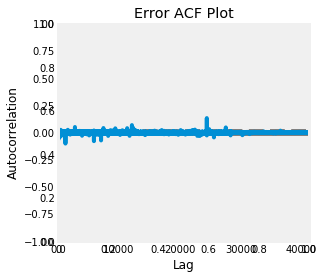

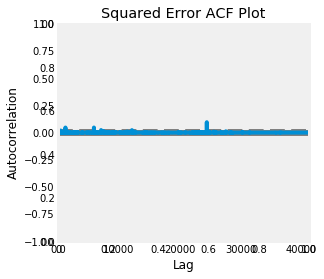

In [148]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data51.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data51.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0, 0.5, 'PACF')

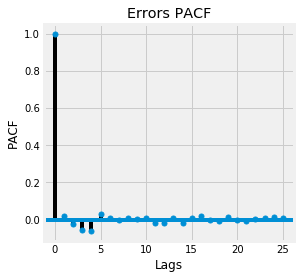

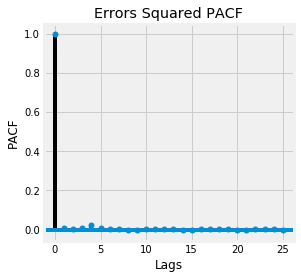

In [149]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data51.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data51.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Analyzing NASDAQ.EBAY

In [150]:
df5 = df1
df5.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CBOE,diflogNASDAQ.CBOE,logNASDAQ.CSCO,diflogNASDAQ.CSCO
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,121.700,53.365,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181


In [151]:
df5['logNASDAQ.EBAY']= np.log(df5['NASDAQ.EBAY'])
df5['diflogNASDAQ.EBAY']= df5['logNASDAQ.EBAY'] - df5['logNASDAQ.EBAY'].shift(periods=-1)
df5 = df5.dropna()

In [152]:
df5.shape

(41264, 512)

In [153]:
data6 = df5[['DATE', 'NASDAQ.EBAY', 'logNASDAQ.EBAY', 'diflogNASDAQ.EBAY']]

In [154]:
df5.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CBOE,diflogNASDAQ.CBOE,logNASDAQ.CSCO,diflogNASDAQ.CSCO,logNASDAQ.EBAY,diflogNASDAQ.EBAY
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141,3.508481,0.000075
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590,3.508406,-0.000449
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479,3.508855,0.002247
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293,3.506608,-0.001948
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181,3.508556,-0.000898


In [155]:
data6.head()

,DATE,NASDAQ.EBAY,logNASDAQ.EBAY,diflogNASDAQ.EBAY
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


In [156]:
Data6 = data6.rename(index=str, columns={"NASDAQ.EBAY":"NASDAQ_EBAY", "logNASDAQ.EBAY":"logNASDAQ_EBAY", "diflogNASDAQ.EBAY":"diflogNASDAQ_EBAY"})
Data6.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


Text(0.5, 0, 'Day')

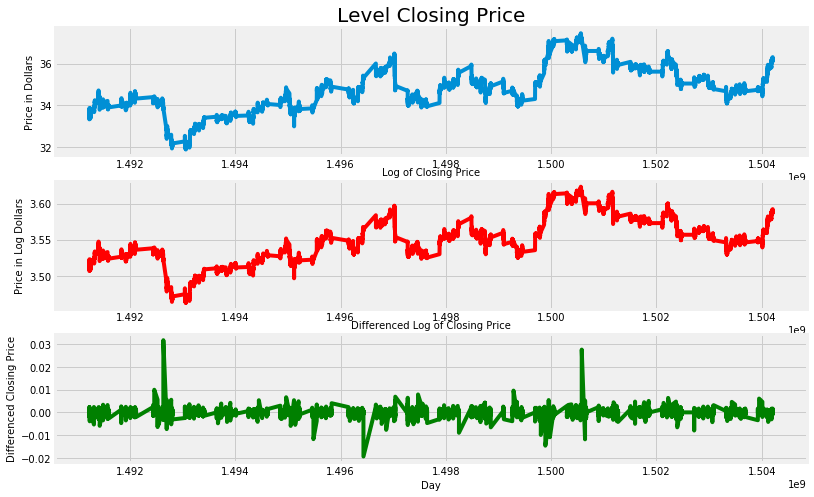

In [157]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data6.DATE, Data6.NASDAQ_EBAY, label = "NASDAQ.EBAY Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data6.DATE, Data6.logNASDAQ_EBAY, label = 'Log of NASDAQ.EBAY', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data6.DATE, Data6.diflogNASDAQ_EBAY, label = '1st Difference of Log of NASDAQ.ADP', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0, 0.5, 'PACF')

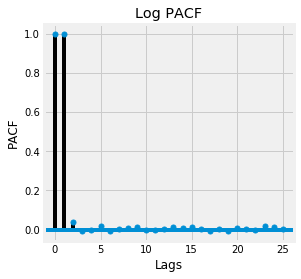

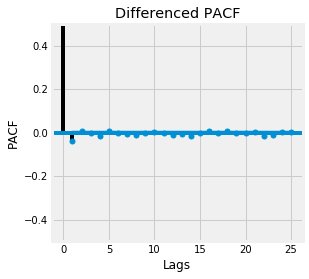

In [158]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data6.logNASDAQ_EBAY, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data6.diflogNASDAQ_EBAY, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [159]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest5 = adfuller(Data6.diflogNASDAQ_EBAY, autolag='AIC')
dfoutput5 = pd.Series(dftest5[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest5[4].items():
    dfoutput5['Critical Value (%s)'%key] = value
print (dfoutput5)

Results of Dickey-Fuller Test:
Test Statistic                   -30.655871
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations used    41217.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [160]:
ararray6 = (Data6.logNASDAQ_EBAY.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray6, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod6 = ARIMA(ararray6, (p,d,q)).fit()

(0, 1, 0) -486513.51762098644
(0, 1, 1) -486576.9175508
(0, 1, 2) -486577.37612118677
(1, 1, 0) -486577.8503335217
(1, 1, 1) -486577.1778194901
(1, 1, 2) -486575.49643330986
(2, 1, 0) -486577.4651696064
(2, 1, 1) -486575.4645369486
(2, 1, 2) -486573.52164959745
Best Model is : (1, 1, 0)


In [161]:
ARIMIAmod6

In [162]:
predict6 = ARIMIAmod6.predict()
predict6

array([ 1.90587844e-06,  4.98258141e-06, -1.60162618e-05, ...,
        7.52848014e-06, -3.56394910e-06,  7.52848014e-06])

In [163]:
predict6.shape

(41263,)

In [164]:
len(ARIMIAmod6.predict())

41263

In [165]:
Data61 = Data6.drop(Data3.index[0])

In [166]:
Data61.shape

(41263, 4)

In [167]:
Data61['predict'] = predict6

In [168]:
Data61.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY,predict
1,1491226260,33.395,3.508406,-0.000449,0.000002
2,1491226320,33.410,3.508855,0.002247,0.000005
3,1491226380,33.335,3.506608,-0.001948,-0.000016
4,1491226440,33.400,3.508556,-0.000898,0.000092
5,1491226500,33.430,3.509454,-0.001046,-0.000076


In [169]:
np.mean(np.square(np.array((Data61['diflogNASDAQ_EBAY'] - Data61['predict']))))

4.4396841804497825e-07

In [170]:
numofsteps6 = 1
stephead6 = ARIMIAmod.forecast(numofsteps6)[0]
ferrors6 = ARIMIAmod.forecast(numofsteps6)[2]
ferrors6

array([[7.81217094, 7.81305108]])

In [171]:
error6 = (Data61['diflogNASDAQ_EBAY'] - Data61['predict'])
Data61['sqrError'] = np.square(error6)

In [172]:
Data61.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY,predict,sqrError
1,1491226260,33.395,3.508406,-0.000449,0.000002,2.033776e-07
2,1491226320,33.410,3.508855,0.002247,0.000005,5.028258e-06
3,1491226380,33.335,3.506608,-0.001948,-0.000016,3.732576e-06
4,1491226440,33.400,3.508556,-0.000898,0.000092,9.798155e-07
5,1491226500,33.430,3.509454,-0.001046,-0.000076,9.415266e-07


In [173]:
Data61['errors'] = error6

In [174]:
Data61.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY,predict,sqrError,errors
1,1491226260,33.395,3.508406,-0.000449,0.000002,2.033776e-07,-0.000451
2,1491226320,33.410,3.508855,0.002247,0.000005,5.028258e-06,0.002242
3,1491226380,33.335,3.506608,-0.001948,-0.000016,3.732576e-06,-0.001932
4,1491226440,33.400,3.508556,-0.000898,0.000092,9.798155e-07,-0.000990
5,1491226500,33.430,3.509454,-0.001046,-0.000076,9.415266e-07,-0.000970


Text(0.5, 0, 'Month')

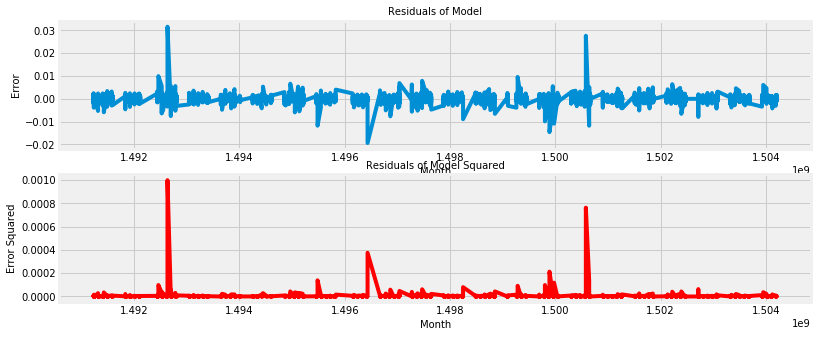

In [175]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data61.DATE, Data61.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data61.DATE, Data61.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0.5, 1.0, 'Squared Error ACF Plot')

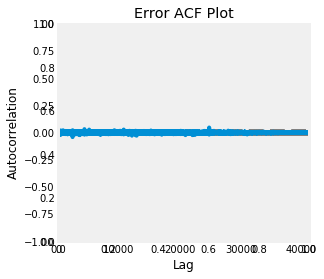

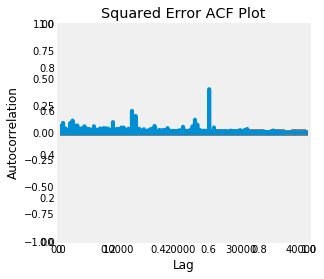

In [176]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data61.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data61.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0, 0.5, 'PACF')

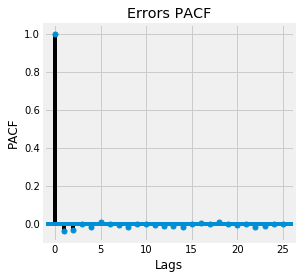

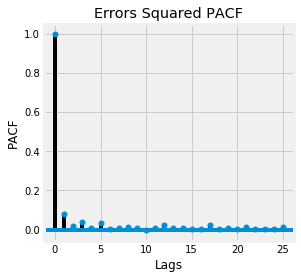

In [177]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data61.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data61.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')